In [201]:
# Example of HealPix B field visualization
#
# Copyright (C) 2013-2025 Juan Diego Soler

In [207]:
import sys
import numpy as np
from astropy.io import fits
from astropy import units as u

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors

import healpy as hp
from healpy.newvisufunc import projview
from reproject import reproject_from_healpix, reproject_to_healpix

import sys
sys.path.append('../')
from bvisualhp import *

from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
from astropy.visualization.wcsaxes import SphericalCircle

In [208]:
nside=128
ivec=np.arange(hp.nside2npix(nside))
glon, glat = hp.pix2ang(nside, ivec, lonlat=True)
testImap=np.exp((np.cos(np.deg2rad(glat))/0.25)**2)

In [212]:
glon0=90.0; glat0=0.0;
deltal=glon-glon0
bx=-np.cos(np.deg2rad(glat0))*np.sin(np.deg2rad(deltal))
by=-(np.cos(np.deg2rad(glat))*np.sin(np.deg2rad(glat0))-np.sin(np.deg2rad(glat))*np.cos(np.deg2rad(glat0))*np.cos(np.deg2rad(deltal)))


In [210]:
# Define LIC parameters
liclen=np.deg2rad(10.)
licres=np.deg2rad(1.)

In [211]:
lic_map0 = healpix_lic(by, bx, nside, length=liclen, ds=licres, kernel='gaussian')
lic_map1 = healpix_lic(by, bx, nside, length=liclen, ds=licres, kernel='gaussian', noise_map=lic_map0)
lic_map2 = healpix_lic(by, bx, nside, length=liclen, ds=licres, kernel='gaussian', noise_map=lic_map1)
lic_map3 = healpix_lic(by, bx, nside, length=liclen, ds=licres, kernel='gaussian', noise_map=lic_map2)

100%|██████████| 196608/196608 [03:53<00:00, 842.37it/s] 


In [237]:
cmap_colors = plt.get_cmap('binary', 1024)(np.linspace(0, 1, 1024))
cmap_colors[..., 3] = 0.5  # Make colormap partially transparent
cmap = colors.ListedColormap(cmap_colors)

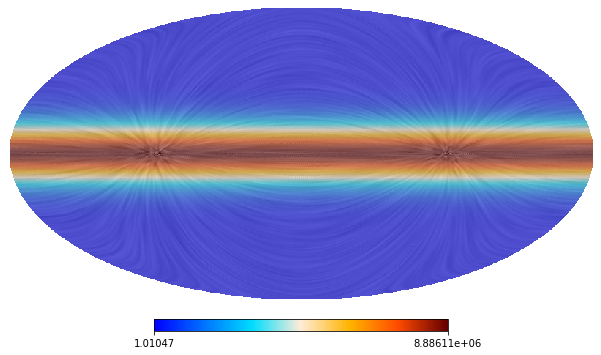

In [238]:
hp.mollview(testImap, cmap=planckct())
hp.mollview(lic_map3, cmap=cmap, cbar=False, reuse_axes=True, title='')

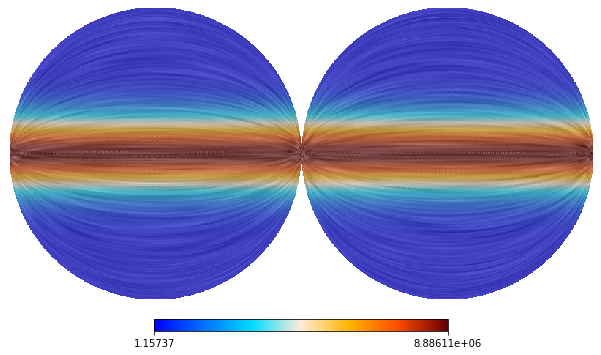

In [242]:
hp.orthview(testImap, cmap=planckct())
hp.orthview(lic_map3, cmap=cmap, cbar=False, reuse_axes=True, title='')

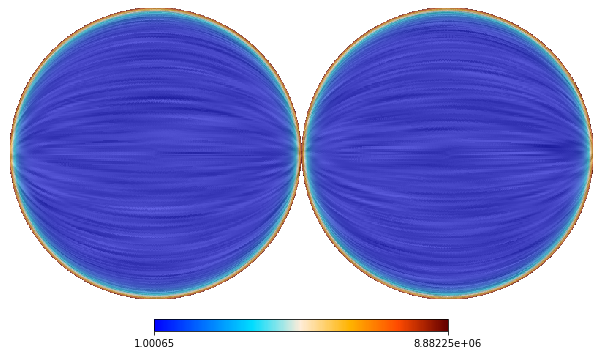

In [241]:
hp.orthview(testImap, cmap=planckct(), rot=[0.,90.])
hp.orthview(lic_map3, cmap=cmap, cbar=False, reuse_axes=True, title='', rot=[0.,90.])